## Titanic problem With Machine learning

In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
url='C:\\Users\\vsiripuram\\Desktop\\python\\titanic'
test_file_path= os.path.join(url,'test.csv')
train_file_path= os.path.join(url,'train.csv')

In [6]:
train_df=pd.read_csv(train_file_path,index_col='PassengerId')
test_df=pd.read_csv(test_file_path,index_col='PassengerId')

In [7]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
type(train_df)

pandas.core.frame.DataFrame

### Basic structure

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
test_df['Survived']=-888

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [13]:
df=pd.concat((test_df,train_df),axis=0,sort='True')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [15]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298


In [16]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
887,27.0,NaN,S,13.00,"Montvila, Rev. Juozas",0,2,male,0,0,211536
888,19.0,B42,S,30.00,"Graham, Miss. Margaret Edith",0,1,female,0,1,112053
889,NaN,NaN,S,23.45,"Johnston, Miss. Catherine Helen ""Carrie""",2,3,female,1,0,W./C. 6607
890,26.0,C148,C,30.00,"Behr, Mr. Karl Howell",0,1,male,0,1,111369
891,32.0,NaN,Q,7.75,"Dooley, Mr. Patrick",0,3,male,0,0,370376


In [17]:
df.Name

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [18]:
df[['Name','Age']]

,Name,Age
PassengerId,,
892,"Kelly, Mr. James",34.5
893,"Wilkes, Mrs. James (Ellen Needs)",47.0
894,"Myles, Mr. Thomas Francis",62.0
895,"Wirz, Mr. Albert",27.0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0
897,"Svensson, Mr. Johan Cervin",14.0
898,"Connolly, Miss. Kate",30.0
899,"Caldwell, Mr. Albert Francis",26.0
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0


In [19]:
df.loc[5:10]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [20]:
df.iloc[5:10,3:5]

,Fare,Name
PassengerId,,
897,9.2250,"Svensson, Mr. Johan Cervin"
898,7.6292,"Connolly, Miss. Kate"
899,29.0000,"Caldwell, Mr. Albert Francis"
900,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"
901,24.1500,"Davies, Mr. John Samuel"


In [21]:
df.loc[5:10,'Age':'Parch']

,Age,Cabin,Embarked,Fare,Name,Parch
PassengerId,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0


In [22]:
df.loc[5:10,['Age','Nmae','Pclass']]

C:\Users\vsiripuram\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Age,Nmae,Pclass
PassengerId,,,
5,35.0,NaN,3
6,NaN,NaN,3
7,54.0,NaN,1
8,2.0,NaN,3
9,27.0,NaN,3
10,14.0,NaN,2


In [23]:
male_passengers=df.loc[df.Sex=='male',:]
print('The number of male passangers :{0}'.format(len(male_passengers)))

The number of male passangers :843


In [24]:
class_passengers=df.loc[(df.Sex=='male') & (df.Pclass==1),:]
print("the number male passengers in the first class :{0}".format(len(class_passengers)))

the number male passengers in the first class :179


### Summary Statistics
Numarical Features

In [25]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [26]:
print('Mean Fare : {0}'.format(df.Fare.mean()))
print('Median Fare :{0}'.format(df.Fare.median()))

Mean Fare : 33.295479281345585
Median Fare :14.4542


In [27]:
print('Min Fare :{0}'.format(df.Fare.min()))
print('Max Fare :{0}'.format(df.Fare.max()))
print('Fare Range : {0}'.format(df.Fare.max()-df.Fare.min()))
print('25th percentails:{0}'.format(df.Fare.quantile(.25)))
print('50th percentails :{0}'.format(df.Fare.quantile(.5)))
print('75th percentails :{0}'.format(df.Fare.quantile(.75)))
print('Varance of Fare is :{0}'.format(df.Fare.var()))
print('Standard Deviation Fare:{0}'.format(df.Fare.std()))

Min Fare :0.0
Max Fare :512.3292
Fare Range : 512.3292
25th percentails:7.8958
50th percentails :14.4542
75th percentails :31.275
Varance of Fare is :2678.959737892895
Standard Deviation Fare:51.758668239174156


In [28]:
%matplotlib inline

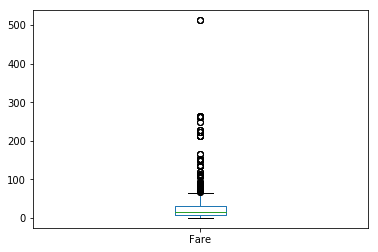

In [29]:
df.Fare.plot(kind='box')

Catagorical Features
Counts and Proportions

In [30]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [31]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [32]:
df[df.Survived!=-888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [34]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

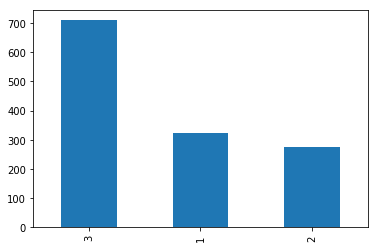

In [35]:
df.Pclass.value_counts().plot(kind='bar')

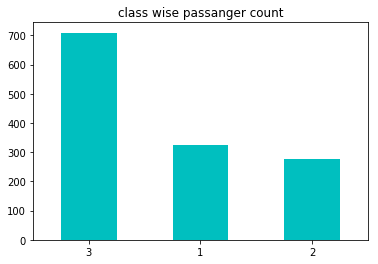

In [36]:
df.Pclass.value_counts().plot(kind='bar',rot=0,title='class wise passanger count',color='c')

In [37]:
%%HTML
<Style type="text\css">
table.dataframe td,table.dataframe th {
    
    border-style : solid;
}

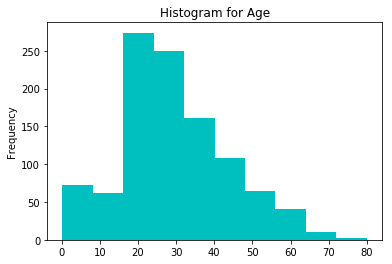

In [38]:
df.Age.plot(kind='hist',title='Histogram for Age',color='c')

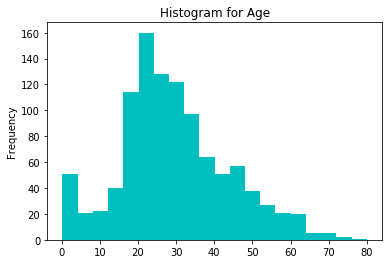

In [39]:
df.Age.plot(kind='hist',title='Histogram for Age',color='c',bins=20)

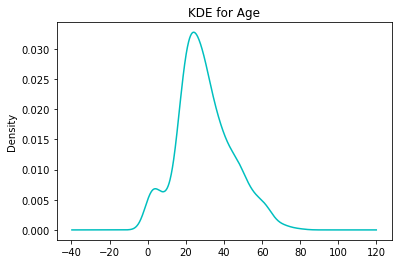

In [40]:
df.Age.plot(kind='kde',title='KDE for Age',color='c')

In [41]:
print('the skewness for age :{0}'.format(df.Age.skew()))
print('The skewness of Fare :{0}'.format(df.Fare.skew()))

the skewness for age :0.40767455974362266
The skewness of Fare :4.367709134122921


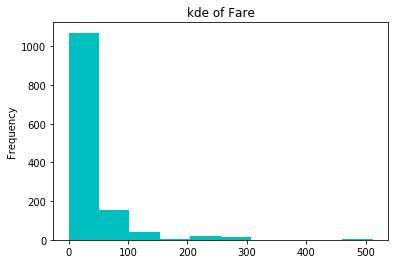

In [42]:
df.Fare.plot(kind='hist',title='kde of Fare',color='c')

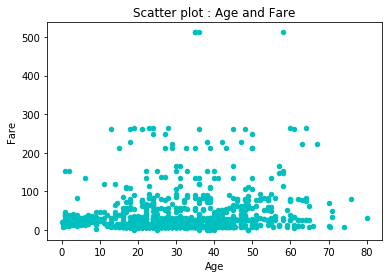

In [43]:
df.plot.scatter(x='Age',y='Fare',color='c',title='Scatter plot : Age and Fare')

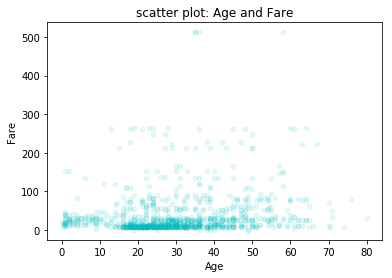

In [44]:
df.plot.scatter(x='Age',y='Fare',color='c',title='scatter plot: Age and Fare',alpha=0.1)

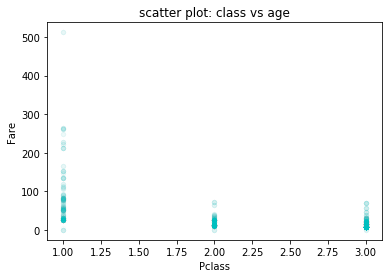

In [45]:
df.plot.scatter(x='Pclass',y='Fare',color='c',title='scatter plot: class vs age',alpha=0.025)

### Grouping and Aggregation 

In [46]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [47]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [48]:
df.groupby('Pclass')['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [49]:
df.groupby('Pclass').agg({'Fare': 'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [50]:
Aggregation = {
    
    'Fare':{
        'mean-fare':'mean',
        'median-fare':'median',
        'max-fare':max,
        'min-fare':min
        },
    'Age':{
        'mean-Age':'mean',
        'median-Age':'median',
        'age range':lambda x:max(x)-min(x)
            }
}

In [51]:
df.groupby('Pclass').agg(Aggregation)

C:\Users\vsiripuram\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age             \
        mean-fare median-fare  max-fare min-fare   mean-Age median-Age   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0  39.159930       39.0   
2       21.179196     15.0458   73.5000      0.0  29.506705       29.0   
3       13.302889      8.0500   69.5500      0.0  24.816367       24.0   

                  
       age range  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [52]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

### crosstab

In [53]:
pd.crosstab(df.Pclass,df.Sex)

Sex,female,male
Pclass,,
1,144,179
2,106,171
3,216,493


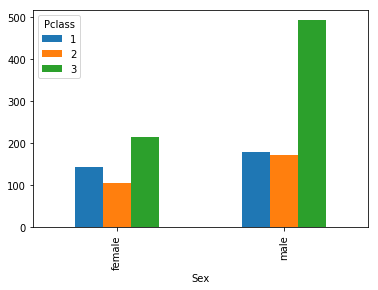

In [54]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar')

### pivot table

In [55]:
df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [56]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [57]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Mungging

Common Activites (Data Quality issues)

1) common issues in the data need to fix with appropriate ways

2) Encounting the Missing Values --- inappropriate information 

3) Extreme values (outliers) -- mean, median ,std,var will be impart because of this extreme values

4) Erroneous values -- miss leading values which are also give the most impect

  #### issue
- inaccurate analysis
- Modeling won't work in many cases
 #### solution
- Deletion (if you have very less values) but it's not correct way bcz deleting data means loosing the information
- imputation ( imputation is noting but replacing some missing values with sutable values)
 
 ##### Imputation techenics
 
 - Mean imputation (calcuate the mean value and replace with missing vlaues) but if you have extream values it's not a good         solution
 - Meadian imputation (calcuate the meadian value and replace with missing vlaues) 
 - Mode imputation ( if you are dealing with categorical value will go for mode imputation ) replace with hight frequence
    values
 - more complex techinic for replacing missing values
 - Forward / Backward Fill (fill with previous value or next available value)
 - Predictive Models (we can also use predictive models to replace the missing values)
 
 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [59]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [60]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [61]:
pd.crosstab(df[df.Survived !=-888].Survived,df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [62]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [63]:
# by using the above result most poassible Embarked value is C
# so let's replace the vlaues
df.Embarked.fillna('c',inplace=True)

In [64]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [65]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [66]:
median_fare=df.loc[(df.Pclass== 3) & (df.Embarked=='S'),'Fare'].median()
print(median_fare)

8.05


In [67]:
df.Fare.fillna(median_fare,inplace=True)

In [68]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [69]:
pd.options.display.max_rows =15

In [70]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
902,NaN,NaN,S,7.8958,"Ilieff, Mr. Ylio",0,3,male,0,-888,349220
914,NaN,NaN,S,31.6833,"Flegenheim, Mrs. Alfred (Antoinette)",0,1,female,0,-888,PC 17598
921,NaN,NaN,C,21.6792,"Samaan, Mr. Elias",0,3,male,2,-888,2662
925,NaN,NaN,S,23.4500,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",2,3,female,1,-888,W./C. 6607
928,NaN,NaN,S,8.0500,"Roth, Miss. Sarah A",0,3,female,0,-888,342712
931,NaN,NaN,S,56.4958,"Hee, Mr. Ling",0,3,male,0,-888,1601
933,NaN,D34,S,26.5500,"Franklin, Mr. Thomas Parham",0,1,male,0,-888,113778
...,...,...,...,...,...,...,...,...,...,...,...
847,NaN,NaN,S,69.5500,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343


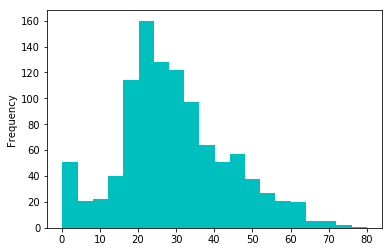

In [71]:
df.Age.plot(kind='hist',bins=20,color='c')

In [72]:
df.Age.mean()

29.881137667304014

In [73]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

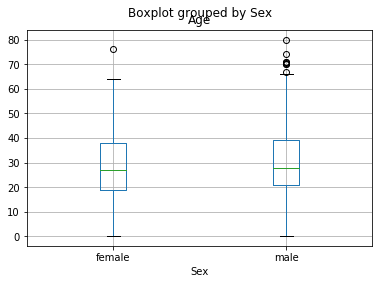

In [74]:
df[df.Age.notnull()].boxplot('Age','Sex')

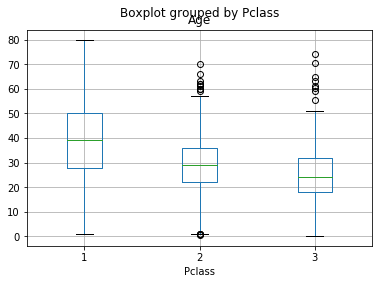

In [75]:
df[df.Age.notnull()].boxplot('Age','Pclass')

In [76]:
df.Name

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                      Svensson, Mr. Johan Cervin
898                            Connolly, Miss. Kate
                           ...                     
885                          Sutehall, Mr. Henry Jr
886            Rice, Mrs. William (Margaret Norton)
887                           Montvila, Rev. Juozas
888                    Graham, Miss. Margaret Edith
889        Johnston, Miss. Catherine Helen "Carrie"
890                           Behr, Mr. Karl Howell
891                             Dooley, Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [77]:
df["Name"].str.split(',')[1][1].split('.')[0]

' Mr'

In [78]:
def GetTitle(name):
    first_name_with_title= name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title

In [79]:
df.Name.map(lambda x: GetTitle(x))

PassengerId
892      mr
893     mrs
894      mr
895      mr
896     mrs
897      mr
898    miss
       ... 
885      mr
886     mrs
887     rev
888    miss
889    miss
890      mr
891      mr
Name: Name, Length: 1309, dtype: object

In [80]:
# df['Title']=df.Name.map(lambda x: GetTitle(x))

In [81]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298


In [82]:
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona',
       'don', 'mme', 'major', 'lady', 'sir', 'mlle', 'capt',
       'the countess', 'jonkheer'], dtype=object)

In [83]:
def GetTitle(name):
    title_group={
        'mr':'Mr',
        'mrs' : 'Mrs',
        'miss':'Miss',
        'master':'Master',
        'ms':'Mrs',
        'col':'Officer',
        'rev':'Sir',
        'dr':'Officer',
        'dona':'Lady',
       'don':'Sir',
        'mme':'Mrs',
        'major':'Officer',
        'lady':'Lady',
        'sir':'Sir',
        'mlle':'Miss',
        'capt':'Officer',
       'the countess':'Lady',
        'jonkheer':'Sir'
       
    }
    first_name_with_title= name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title

In [84]:
df['Title']=df.Name.map(lambda x:GetTitle(x))

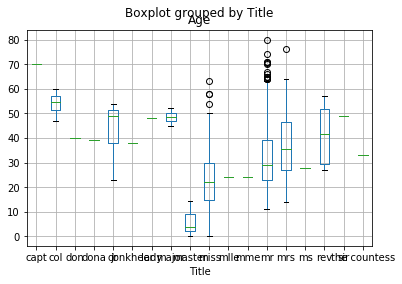

In [85]:
df[df.Age.notnull()].boxplot('Age','Title')

In [86]:
title_age_median=df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median,inplace=True)

### Outliers
 -  by using histogram, barchar, scatter plot
 - need study some outliers and outlier models
 - removal , Transformation,binning imputation
 
### working with outliers

In [ ]:
df.Age.plot(kind='hist',color='c')

In [ ]:
df.loc[df.Age>70]

In [ ]:
df.Fare.plot(kind='hist',color='c')

In [ ]:
df.Fare.plot(kind='box')

In [ ]:
df[df.Fare == df.Fare.max()]

In [ ]:
LogFare=np.log(df.Fare+1.0)

In [ ]:
LogFare.plot(kind='hist',color='c')

In [ ]:
pd.qcut(df.Fare,4)

In [ ]:
pd.qcut(df.Fare,4, labels=['very low','low','high','very high'])

In [ ]:
pd.qcut(df.Fare,4, labels=['very low','low','high','very high']).value_counts().plot(kind='bar',color='c')

In [87]:
df['Fare_Bin']=pd.qcut(df.Fare,4,labels=['very_low','low','high','very_high'])

### Feature Engineering

- Fearure Engineering is a process of transforming  raw data (use less data) to better representation feature, that will be    usefull for better predictive models
#### Activities

    Transformation
    
    Creation (using the domain experience we need to crearte new feature by using existing )
    
    Selection  we need to select the best feature for best predictions
       
    

In [88]:
df['AgeState']=np.where(df.Age>=18,'Adult','child')

In [89]:
df.groupby('AgeState').AgeState.value_counts()

AgeState  AgeState
Adult     Adult       1147
child     child        162
Name: AgeState, dtype: int64

In [90]:
df['AgeState'].value_counts()

Adult    1147
child     162
Name: AgeState, dtype: int64

In [91]:
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived !=-888].AgeState)

AgeState,Adult,child
Survived,,
0,495,54
1,279,63


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 14 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
AgeState    1309 non-null object
dtypes: category(1), float64(2), int64(4), object(7)
memory usage: 184.6+ KB


In [93]:
df['FamilySize']=df.Parch + df.SibSp + 1

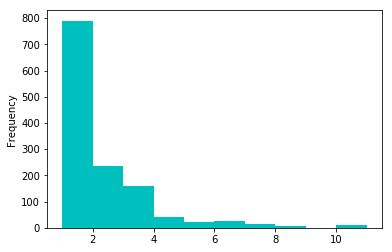

In [94]:
df.FamilySize.plot(kind='hist',color='c')

In [95]:
df.loc[df.FamilySize==df.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343
1252,"Sage, Master. William Henry",-888,11,CA. 2343
1257,"Sage, Mrs. John (Annie Bullen)",-888,11,CA. 2343
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343


In [96]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [97]:
df['IsMother']=np.where(((df.Sex=='female') & (df.Parch > 0) & (df.Age > 18) & (df.Title!='Miss')),1,0)

In [98]:
df['IsMother'].value_counts()

0    1195
1     114
Name: IsMother, dtype: int64

In [99]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].IsMother)

IsMother,0,1
Survived,,
0,524,25
1,291,51


In [100]:
df.Cabin

PassengerId
892     NaN
893     NaN
894     NaN
895     NaN
896     NaN
897     NaN
898     NaN
       ... 
885     NaN
886     NaN
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 1309, dtype: object

In [101]:
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [102]:

df.loc[df.Cabin=='T','Cabin'] = None

In [103]:
# I have one doubet here need to clarify
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [104]:
def get_deck(Cabin):
    return np.where(pd.notnull(Cabin),str(Cabin)[0].upper(),'z')
df['Deck']=df['Cabin'].map(lambda x:get_deck(x))

In [105]:
np.where(pd.notnull(df.Cabin),str(df.Cabin)[0].upper(),'z')

array(['z', 'z', 'z', ..., 'z', 'P', 'z'], dtype='<U1')

In [106]:
df.Deck.value_counts()

z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [107]:
pd.crosstab(df[df.Survived!=-888].Survived,df[df.Survived!=-888].Deck)

Deck,A,B,C,D,E,F,G,z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [108]:
df.info()
# as of now we have 17 features 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB





- Categorical Feature encoding


### Binary Encoding

- is one of best feature for categorical encoding values

M---1  (all Male values need to encoding with 1 )
F---0  (all Female values are need to encoding with 0)

### Label Encoding
Mulit category encoding 
let's take sample " Fare "
Fare with low medium and high values

    label     encoding 
     low       1
     medium    2
     high      3

###  One-Hot Encoding
Example

Embarked Feature  :  A   B  C
is_A: 0 1 0 1 0 0 
is_B: 1 0 0 0 1 0
is_c: 0 0 1 0 0 1

label  A    B    C
is_a   0    1   0
is_b   1    0   0
is_c   0    0   1





In [109]:
df['IsMale']=np.where(df.Sex=='male',1,0)

In [110]:
df=pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 51 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcl

In [112]:
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'] , axis=1 ,inplace=True)

In [113]:
columns=[column for column in df.columns if column != 'Survived']
columns=['Survived']+columns
df=df[columns]
df

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,...,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,Embarked_c,AgeState_Adult,AgeState_child
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,-888,34.5,7.8292,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
893,-888,47.0,7.0000,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
894,-888,62.0,9.6875,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
895,-888,27.0,8.6625,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
896,-888,22.0,12.2875,3,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
897,-888,14.0,9.2250,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
898,-888,30.0,7.6292,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,25.0,7.0500,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 45 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_capt            1309 non-null uint8
Title_col             1309 non-null uint8
Title_don             1309 non-null uint8
Title_dona            1309 non-null uint8
Title_

- Still now we are convrted raw data into processed data

### Save dataframe to files using Pandas

In [115]:
url='C:\\Users\\vsiripuram\\Desktop\\python\\titanic'
write_train_path=os.path.join(url,'train.csv')
write_test_path=os.path.join(url,'test.csv')

In [116]:
df.loc[df.Survived!=-888].to_csv(write_train_path)


In [117]:
columns=[column for column in df.columns if column!='Survived']
df.loc[df.Survived==-888,columns].to_csv(write_test_path)

### Building the Data Porcssing Script

In [1]:
get_processed_data_script_file=os.path.join(url,'get_processed_data.py')

NameError: name 'os' is not defined

In [2]:
%%writefile $get_processed_data_script_file

import numpy as np
import pandas as pd
import os

def read_data():
    url='C:\\Users\\vsiripuram\\Desktop\\python\\titanic'
    test_file_path= os.path.join(url,'test.csv')
    train_file_path= os.path.join(url,'train.csv')
    train_df=pd.read_csv(train_file_path,index_col='PassengerId')
    test_df=pd.read_csv(test_file_path,index_col='PassengerId')
    test_df['Survived']=-888
    df=pd.concat((test_df,train_df),axis=0,sort='True')
    return df

def process_data(df):
    # we are using the method chaining concept
    # we are give the ongroup of result set to immedite next group
    return (df
            .assign(Title= lambda x: x.Name.map(get_title))
            #missing values
            .pipe(fill_missing_values)
            .assign(Fare_Bin=lambda x:pd.qcut(x.Fare,4,labels=['very_low','low','high','very_high']))
            .assign(AgeState= lambda x: np.where(x.Age>=18,'Adult','child'))
            .assign(FamilySize=lambda x:x.Parch + x.SibSp + 1)
            .assign(IsMother=lambda x : np.where(((x.Sex=='female') & (x.Parch > 0) & (x.Age > 18) & (x.Title!='Miss')),1,0))
            
            .assign(Cabin=lambda x: np.where(x.Cabin =='T', np.nan , x.Cabin))
            .assign(Deck=lambda x: x.Cabin.map(get_deck))
            
            .assign(IsMale= lambda x : np.where(x.Sex=='male',1,0))
            .pipe(pd.get_dummies,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])
            .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'] , axis=1)
            .pipe(reorder_columns)
           )

def get_title(name):
    title_group={
        'mr':'Mr',
        'mrs' : 'Mrs',
        'miss':'Miss',
        'master':'Master',
        'ms':'Mrs',
        'col':'Officer',
        'rev':'Sir',
        'dr':'Officer',
        'dona':'Lady',
       'don':'Sir',
        'mme':'Mrs',
        'major':'Officer',
        'lady':'Lady',
        'sir':'Sir',
        'mlle':'Miss',
        'capt':'Officer',
       'the countess':'Lady',
        'jonkheer':'Sir'}
    first_name_with_title= name.split(',')[1]
    title=first_name_with_title.split('.')[0]
    title=title.strip().lower()
    return title
    
def fill_missing_values(df):
    df.Embarked.fillna('C',inplace=True)
    median_fare=df[(df.Pclass==3) & (df.Embarked=='S')]['Fare'].median()
    df.Fare.fillna(median_fare,inplace=True)
    return df

def get_deck(Cabin):
    return np.where(pd.notnull(Cabin),str(Cabin)[0].upper(),'z')

def reorder_columns(df):
    columns=[column for column in df.columns if column != 'Survived']
    columns=['Survived']+columns
    df=df[columns]
    return df
def write_data(df):
    url='C:\\Users\\vsiripuram\\Desktop\\python\\titanic'
    write_train_path=os.path.join(url,'train.csv')
    write_test_path=os.path.join(url,'test.csv')
    columns=[column for column in df.columns if column!='Survived']
    df.loc[df.Survived==-888,columns].to_csv(write_test_path)

    
if __name__=='__main__':
    df = read_data()
    df=process_data(df)
    write_data(df)


Writing $get_processed_data_script_file


In [3]:
!python $get_processed_data_script_file


In [ ]:
train_df=pd.read_csv(write_train_path)
train_df.info()

In [ ]:
test_df=pd.read_csv(write_test_path)
test_df.info()

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

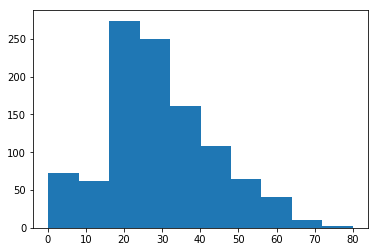

In [81]:
plt.hist(df.Age)

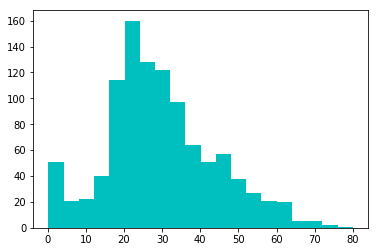

In [84]:
plt.hist(df.Age,bins=20,color='c')
plt.show()

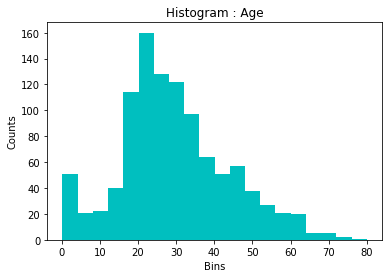

In [87]:
plt.hist(df.Age,bins=20,color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

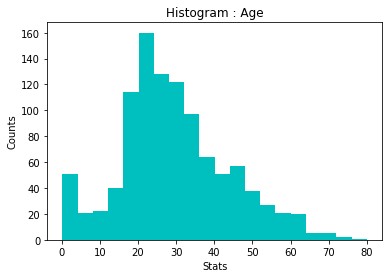

In [91]:
f,ax=plt.subplots()
ax.hist(df.Age,bins=20,color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Stats')
ax.set_ylabel('Counts')
plt.show()

- Subplots
- Mulitple plots in single visulation

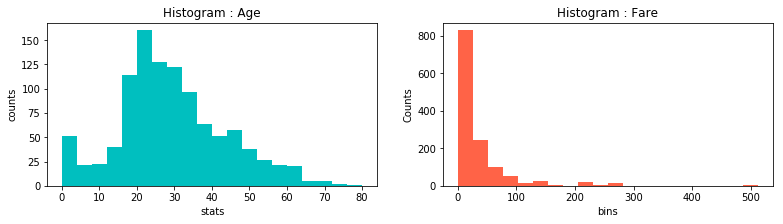

In [120]:
f, (ax1,ax2)=plt.subplots(1,2 ,figsize=(13,3))
ax1.hist(df.Age,bins=20,color='c')
ax1.set_title('Histogram : Age')
ax1.set_xlabel('stats')
ax1.set_ylabel('counts')

ax2.hist(df.Fare,bins=20,color='tomato')
ax2.set_title('Histogram : Fare')
ax2.set_xlabel('bins')
ax2.set_ylabel('Counts')

plt.show()

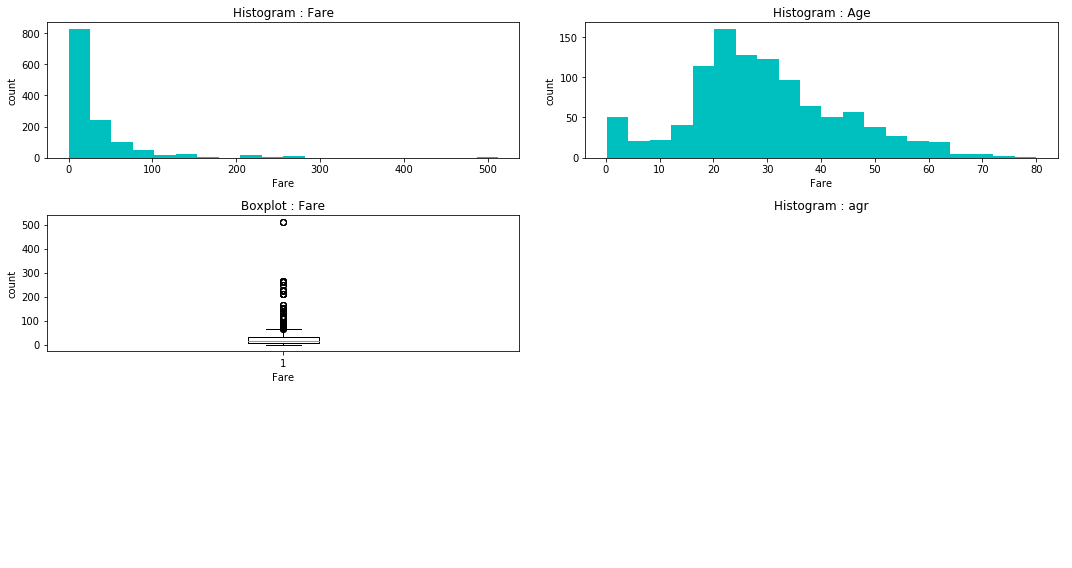

In [135]:
f,ax_arr= plt.subplots(3,2,figsize=(15,8))
ax_arr[0,0].hist(df.Fare,color='c',bins=20)
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Fare')
ax_arr[0,0].set_ylabel('count')

ax_arr[0,1].hist(df.Age,color='c',bins=20)
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Fare')
ax_arr[0,1].set_ylabel('count')

ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Fare')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('count')


ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Histogram : agr')
ax_arr[1,1].set_xlabel('age')
ax_arr[1,1].set_ylabel('age')

plt.tight_layout()
ax_arr[1,1].axis('off')
ax_arr[2,0].axis('off')
ax_arr[2,1].axis('off')

plt.show()

### analyze  + Model

- Machine Learning concepts
- Baseline Model
- Predictive Model
- Fine Ture
- Model Presistence

#### Accuracy

In Traing data set , predict the output result for input feature. if we laredy have the actual output values then we need to compare the actural values and predicated values.

Accuuracy = correct count values / total  count values

Exp

#### Precision
                        predicted Nagitive       Predicted Positive
Actual Negative          True Negitive(TN)              False Positive (FP)

Actual Positive          False Negitive(FN)              True Positive (TP)

Precision   : possitve prediction are correct?
        
                TP/total positive predictive = TP/TP+FP

like we have precision 

#### Recall

Actual Positive          False Negitive(FN)              True Positive (TP)


#### Baseline  Model for Classification

it will give you the mejarity of the calss

class   count
1        60
0        40

baseline model will give you calss 1

baselione model accurecy   =   60/(60+40)  =0.6
